# Viewer with dask delay

This notebook is for segmenting timelapse microscopy data, with associated sinhgle-cell labels and tracks, showing the infection of human macrophages with Mycobacterium Tuberculosis (Mtb), acquired on an Opera Phenix confocal microscope. 

In [1]:
import napari
import cellpose
from octopuslite import utils, tile

### Load experiment of choice

The Opera Phenix is a high-throughput confocal microscope that acquires very large 5-dimensional (TCZXY) images over several fields of view in any one experiment. Therefore, a lazy-loading approach is chosen to mosaic, view and annotate these images. This approach depends upon Dask and DaskFusion. The first step is to load the main metadata file (typically called `Index.idx.xml` and located in the main `Images` directory) that contains the image filenames and associated TCXZY information used to organise the images.

In [2]:
image_dir = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/'
metadata_fn = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Index.idx.xml'
metadata = utils.read_harmony_metadata(metadata_fn)

Reading metadata XML file...


Extracting HarmonyV5 metadata:   0%|          | 0/113400 [00:00<?, ?it/s]

Extracting metadata complete!


### View assay layout and mask information (optional)

The Opera Phenix acquires many time lapse series from a range of positions. The first step is to inspect the image metadata, presented in the form of an `Assaylayout/experiment_ID.xml` file, to show which positions correspond to which experimental assays.

In [3]:
metadata_path = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml'
utils.read_harmony_metadata(metadata_path, assay_layout=True)

Reading metadata XML file...
Extracting metadata complete!


Strain Compound Concentration ConcentrationEC
3 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA            60            EC50
  7     WT      RIF           0.1            EC50
  8     WT      INH          0.04            EC50
  9     WT      BDQ          0.02            EC50
4 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA            60            EC50
  7     WT      RIF           0.1            EC50
  8     WT      INH          0.04            EC50
  9     WT      BDQ          0.02            EC50
5 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA           400            EC99
  7     WT      RIF             2            EC99
  8     WT      INH             2            EC99
  9     WT      BDQ           2.5            EC99
6 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA           400            EC99
  7     WT      RIF             2            EC99
  8     WT      INH             2            EC99
  9     WT      BDQ           2.5            EC99

### Define row and column of choice

In [4]:
row = '3'
column = '7'

### Now to lazily mosaic the images using Dask prior to viewing them.

1x (75,2,3) [TCZ] image stack takes approximately 1 minute to stitch together, so only load the one field of view I want.

In [7]:
images = tile.compile_mosaic(image_dir, metadata, row, column, )
images

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

dask.array<reshape, shape=(75, 2, 3, 6048, 6048), dtype=uint16, chunksize=(1, 2, 3, 2016, 2016), chunktype=numpy.ndarray>

In [5]:
images = tile.legacy_compile_mosaic(image_dir, metadata, row, column, )
images

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

(6048, 6048)
POLYGON ((0 -3887.9949784615387, 0 -6047.994978461538, 2160 -6047.994978461538, 2160 -3887.9949784615387, 0 -3887.9949784615387))
(6048, 6048)
POLYGON ((0 -3887.9949784615387, 0 -6047.994978461538, 2160 -6047.994978461538, 2160 -3887.9949784615387, 0 -3887.9949784615387))
(6048, 6048)
POLYGON ((0 -3887.9949784615387, 0 -6047.994978461538, 2160 -6047.994978461538, 2160 -3887.9949784615387, 0 -3887.9949784615387))
(6048, 6048)
POLYGON ((0 -3887.9949784615387, 0 -6047.994978461538, 2160 -6047.994978461538, 2160 -3887.9949784615387, 0 -3887.9949784615387))
(6048, 6048)
POLYGON ((0 -3887.9949784615387, 0 -6047.994978461538, 2160 -6047.994978461538, 2160 -3887.9949784615387, 0 -3887.9949784615387))
(6048, 6048)
POLYGON ((0 -3887.9949784615387, 0 -6047.994978461538, 2160 -6047.994978461538, 2160 -3887.9949784615387, 0 -3887.9949784615387))
(6048, 6048)
POLYGON ((0 -3887.9949784615387, 0 -6047.994978461538, 2160 -6047.994978461538, 2160 -3887.9949784615387, 0 -3887.9949784615387))


KeyboardInterrupt



In [6]:
images = tile.compile_mosaic(image_dir, metadata, row, column, set_plane= 2, set_channel=2, set_time=73)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
images

dask.array<reshape, shape=(1, 1, 1, 6048, 6048), dtype=uint16, chunksize=(1, 1, 1, 2016, 2016), chunktype=numpy.ndarray>

# Only compile subset of whole image

# Segment 
Let us start simple, only segmenting the lowest Z plane where the largest regions of cells are and only ch1 (GFP) where the GFP signal is.

In [ ]:
!nvcc --version
!nvidia-smi

from cellpose import core, utils, io, models, metrics

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

model = models.Cellpose(gpu=True, model_type='cyto')

def segment(img):
    masks, flows, styles, diams = model.eval(img, diameter=200, channels=[0,0],
                                             flow_threshold=None, cellprob_threshold=0)
    return masks

In [10]:
import os
import pandas as pd
import numpy as np
from typing import Tuple, List, Dict, Union, Optional, Callable
ArrayLike = Union[
    np.ndarray, "dask.array.Array"
]
import dask
import dask.array as da
from functools import partial
from pathlib import Path
FilePath = Union[Path, str]
from tqdm.auto import tqdm

In [12]:
chunk_fraction = 9
load_transform_image = partial(load_image, transforms=input_transforms)

In [11]:
def load_image(
    file: FilePath, transforms: List[Callable[[ArrayLike], ArrayLike]] = None
) -> np.ndarray:
    img = imread(file)
    # if img.ndim == 2:
    #    img = np.expand_dims(img, axis=0)
    if transforms is not None:
        for t in transforms:
            img = t(img)
    return img

In [8]:
input_transforms = None

In [13]:
image_directory = image_dir

In [14]:
set_time = 0
set_channel = 1
set_plane = 1

In [16]:
channel_IDs = (metadata['ChannelID'].unique() 
               if set_channel == None else [set_channel])
plane_IDs = (metadata['PlaneID'].unique() 
             if set_plane == None else [set_plane])
timepoint_IDs = (metadata['TimepointID'].unique() 
             if set_time == None else [set_time])

In [24]:
channel_IDs = metadata['ChannelID'].unique() 
              
plane_IDs = metadata['PlaneID'].unique() 
             
timepoint_IDs = metadata['TimepointID'].unique() 
             

trying to both make it so that only a single slice can be tiled and also to do in a dask delayed manner

In [17]:
from tqdm.auto import tqdm

In [61]:
### stitch the images together over all defined axis
images = [tile.stitch(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]
                    for plane in tqdm(plane_IDs, leave = False)
                for channel in tqdm(channel_IDs, leave = False)
                for time in tqdm(timepoint_IDs, leave = False)]
### stack them together
images = da.stack(images, axis = 0)
# ### reshape them according to TCZXY
images = images.reshape((len(timepoint_IDs), 
                         len(channel_IDs), 
                         len(plane_IDs), 
                         images.shape[-2], images.shape[-1]))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]


KeyboardInterrupt



# now try dask delayed

In [19]:
import dask.array as da
import dask

In [21]:
col = column

In [29]:
import numpy as np

In [32]:
time, plane, channel = 1, 1, 1

In [34]:
dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False).compute()

(dask.array<fuse_func, shape=(6048, 6048), dtype=uint16, chunksize=(2016, 2016), chunktype=numpy.ndarray>,
  <shapely.geometry.polygon.Polygon at 0x7f5c4611bdc0>])

In [30]:
### stitch the images together over all defined axis
images = [da.from_delayed(
          dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False),
                    shape = (6048, 6048), 
                    dtype = np.uint16
                    )[0]
                    for plane in tqdm(plane_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for time in tqdm(timepoint_IDs, leave = False)]
### stack them together
images = da.stack(images, axis = 0)
### reshape them according to TCZXY
images = images.reshape((len(timepoint_IDs), 
                         len(channel_IDs), 
                         len(plane_IDs), 
                         images.shape[-2], images.shape[-1]))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

ValueError: total size of new array must be unchanged

In [121]:
### stitch the images together over all defined axis 
### but do so in using dask delayed
images = [dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]
                    
                    for plane in tqdm(plane_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for time in tqdm(timepoint_IDs, leave = False)]
### create a series of dask arrays out of the delayed funcs
images = [da.from_delayed(frame,
                shape = (6048, 6048), 
                dtype = np.uint16)
                for frame in images]
### rechunk so they are more managable 
images = [frame.rechunk(2016,2016) for frame in images]
### stack them together
images = da.stack(images, axis = 0)
# ### reshape them according to TCZXY
images = images.reshape((len(timepoint_IDs), 
                         len(channel_IDs), 
                         len(plane_IDs), 
                         images.shape[-2], images.shape[-1]))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

In [119]:
from skimage.io import imshow, imread

In [118]:
images[0,0,0].compute()

dask.array<getitem, shape=(6048, 6048), dtype=uint16, chunksize=(2016, 2016), chunktype=numpy.ndarray>

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


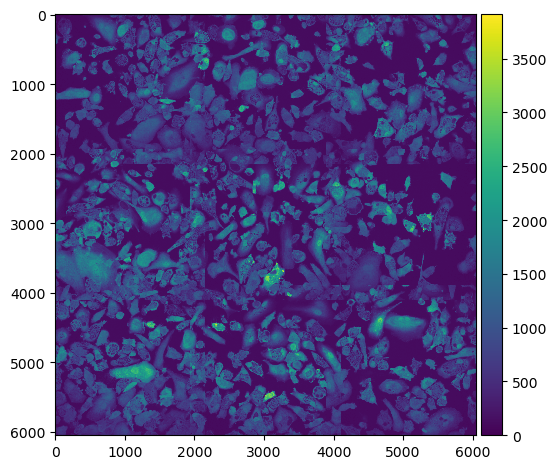

In [122]:
imshow(images[0,0,0].compute())

# Note: think some of the dimensionality may have gotten muddled, with channels appearing swapped at times...


In [123]:
viewer = napari.Viewer()

viewer.add_image(images, 
                 channel_axis=1,
                 name=["macrophage", "mtb"],
                 colormap=["green", "magenta"],
                 contrast_limits=[[100, 2000], [100, 500]]
                 )
# viewer.add_labels(mask_images, 
#                  )

Assistant skips harvesting pyclesperanto as it's not installed.


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


[<Image layer 'macrophage' at 0x7f5c5e90d670>,
 <Image layer 'mtb' at 0x7f5c363f2ca0>]

In [58]:
images = da.stack([tile.stitch(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]
                    for plane in plane_IDs
                    for channel in channel_IDs
                    for time in timepoint_IDs], 
                    axis = 0)

images = images.reshape((len(timepoint_IDs), 
                         len(channel_IDs), 
                         len(plane_IDs), 
                         images.shape[-2], images.shape[-1]))

# Troubleshooting mismatched dimensions

Firstly checking over all channels and planes and time

In [131]:
set_channel = None
set_plane = None
set_time = None

In [134]:
# image_directory: os.PathLike,
# metadata: pd.DataFrame,
# row: int,
# col: int,
# input_transforms: List[Callable[[ArrayLike], ArrayLike]] = None,
# set_plane = None,
# set_channel = None,
# set_time = None
# )->dask.array:

### extract some necessary information from the metadata before tiling
channel_IDs = (metadata['ChannelID'].unique()
           if set_channel == None else [set_channel])
plane_IDs = (metadata['PlaneID'].unique()
             if set_plane == None else [set_plane])
timepoint_IDs = (metadata['TimepointID'].unique()
             if set_time == None else [set_time])
### set a few parameters for the tiling approach
chunk_fraction = 9
load_transform_image = partial(load_image, transforms=input_transforms)
### stitch the images together over all defined axis
### but do so in using dask delayed
images = [dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]

                    for plane in tqdm(plane_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for time in tqdm(timepoint_IDs, leave = False)]
### create a series of dask arrays out of the delayed funcs
images = [da.from_delayed(frame,
                shape = (6048, 6048),
                dtype = np.uint16)
                for frame in images]
# ### rechunk so they are more managable
# images = [frame.rechunk(2016,2016) for frame in images]
# ### stack them together
# images = da.stack(images, axis = 0)
# # ### reshape them according to TCZXY
# images = images.reshape((len(timepoint_IDs),
#                          len(channel_IDs),
#                          len(plane_IDs),
#                          images.shape[-2], images.shape[-1]))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

### The dimensions are seemingly ordered correcty...

In [137]:
plane_IDs

array(['1', '2', '3'], dtype=object)

In [138]:
channel_IDs

array(['1', '2'], dtype=object)

In [139]:
timepoint_IDs

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74'], dtype=object)

### Which means that the following image should be a compilation featuring...

In [144]:
import glob

In [141]:
row, col, channel, time

('3', '7', 1, 1)

In [146]:
files = glob.glob(os.path.join(image_dir, f'r0{row}c0{col}f0*p01-ch{channel}sk{time}fk1fl1.tiff'))
glob.glob(os.path.join(image_dir, f'r0{row}c0{col}f0*p01-ch{channel}sk{time}fk1fl1.tiff'))

['/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f05p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f02p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f09p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f06p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f03p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f08p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f07p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f04p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f01p01-ch1sk1fk1fl1

#### Manually creating first frame

In [149]:
df = metadata

In [ ]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [150]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


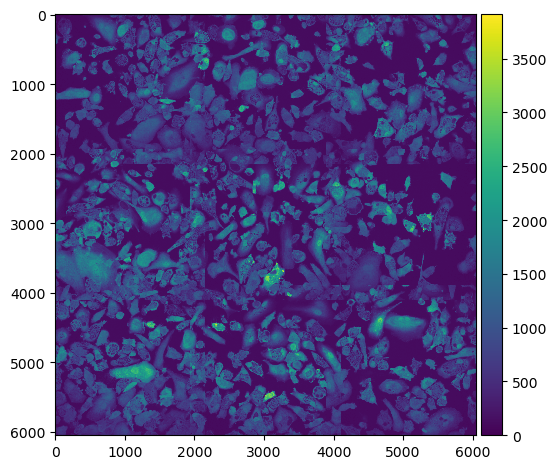

In [154]:
imshow(images[0])

In [168]:
frame[0].compute().astype(np.uint8)

array([[129, 130, 131, ..., 173, 174,   0],
       [135, 134, 132, ..., 184, 181,   0],
       [143, 137, 142, ..., 176, 174,   0],
       ...,
       [242,   9, 245, ..., 110, 109,   0],
       [249,  16, 249, ..., 113, 107,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


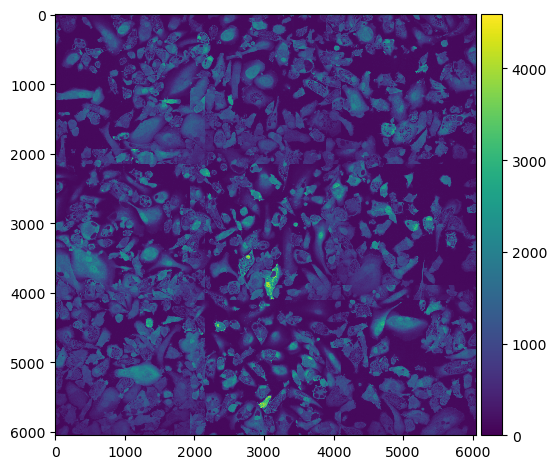

In [157]:
imshow(frame[0])

In [160]:
import matplotlib.pyplot as plt

In [178]:
import napari

In [184]:
f = frame[0].compute()

In [190]:
i = images[0].compute().compute()

In [192]:
i

array([[186, 195, 187, ..., 110, 102,   0],
       [182, 178, 173, ..., 114, 104,   0],
       [165, 169, 182, ..., 112, 112,   0],
       ...,
       [278, 281, 272, ..., 101, 100,   0],
       [277, 282, 273, ..., 107, 100,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint16)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


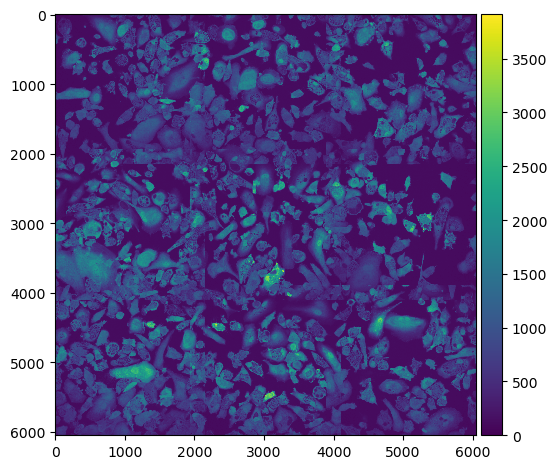

In [196]:
imshow(i)

In [198]:
f.shape

(6048, 6048)

In [199]:
i.shape

(6048, 6048)

In [200]:
import napari

In [202]:
v = napari.Viewer()

v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c562990d0>

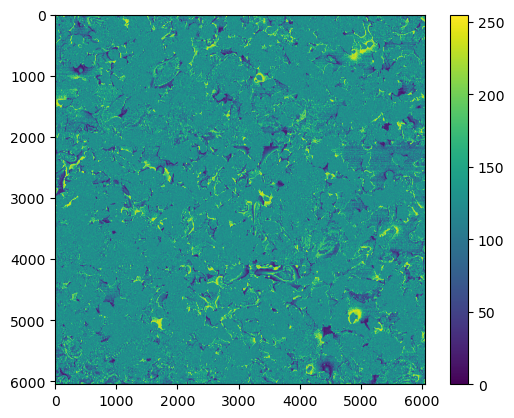

In [171]:
plt.imshow(images[0].compute().astype(np.uint8) - frame[0].compute().astype(np.uint8))
plt.colorbar()
plt.savefig('/home/dayn/Pictures/for_grace/grace_shirt_1.png', dpi = 314, bbox_inches = 'tight')

# These two images appear to be one temporal neighbours
just checking the next plane up

In [205]:
plane_IDs

array(['1', '2', '3'], dtype=object)

In [206]:
plane

1

In [207]:
files = glob.glob(os.path.join(image_dir, f'r0{row}c0{col}f0*p01-ch{channel}sk{time}fk1fl1.tiff'))
glob.glob(os.path.join(image_dir, f'r0{row}c0{col}f0*p0{plane}-ch{channel}sk{time}fk1fl1.tiff'))

['/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f05p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f02p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f09p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f06p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f03p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f08p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f07p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f04p01-ch1sk1fk1fl1.tiff',
 '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c07f01p01-ch1sk1fk1fl1

#### Manually creating first frame

In [208]:
df = metadata

In [209]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [210]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

In [211]:
f = frame[0].compute()

In [212]:
i = images[0].compute().compute()

In [213]:
v = napari.Viewer()

v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c58854af0>

# testing one slice

In [220]:
set_channel = 2
set_plane = 2
set_time = 0

channel = 2
plane = 2
time = 2

In [215]:
# image_directory: os.PathLike,
# metadata: pd.DataFrame,
# row: int,
# col: int,
# input_transforms: List[Callable[[ArrayLike], ArrayLike]] = None,
# set_plane = None,
# set_channel = None,
# set_time = None
# )->dask.array:

### extract some necessary information from the metadata before tiling
channel_IDs = (metadata['ChannelID'].unique()
           if set_channel == None else [set_channel])
plane_IDs = (metadata['PlaneID'].unique()
             if set_plane == None else [set_plane])
timepoint_IDs = (metadata['TimepointID'].unique()
             if set_time == None else [set_time])
### set a few parameters for the tiling approach
chunk_fraction = 9
load_transform_image = partial(load_image, transforms=input_transforms)
### stitch the images together over all defined axis
### but do so in using dask delayed
images = [dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]

                    for plane in tqdm(plane_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for time in tqdm(timepoint_IDs, leave = False)]
### create a series of dask arrays out of the delayed funcs
images = [da.from_delayed(frame,
                shape = (6048, 6048),
                dtype = np.uint16)
                for frame in images]
# ### rechunk so they are more managable
# images = [frame.rechunk(2016,2016) for frame in images]
# ### stack them together
# images = da.stack(images, axis = 0)
# # ### reshape them according to TCZXY
# images = images.reshape((len(timepoint_IDs),
#                          len(channel_IDs),
#                          len(plane_IDs),
#                          images.shape[-2], images.shape[-1]))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [216]:
images[0]

[dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>]

In [218]:
i = images[0].compute()

#### Manually creating corresponding frame

In [227]:
set_channel = 2
set_plane = 2
set_time = 0

channel = 2
plane = 2
time = 0

In [230]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [231]:
filtered_df

id State                             URL Row Col FieldID  \
219  0307K1F1P2R2    Ok  r03c07f01p02-ch2sk1fk1fl1.tiff   3   7       1   
225  0307K1F2P2R2    Ok  r03c07f02p02-ch2sk1fk1fl1.tiff   3   7       2   
231  0307K1F3P2R2    Ok  r03c07f03p02-ch2sk1fk1fl1.tiff   3   7       3   
237  0307K1F4P2R2    Ok  r03c07f04p02-ch2sk1fk1fl1.tiff   3   7       4   
243  0307K1F5P2R2    Ok  r03c07f05p02-ch2sk1fk1fl1.tiff   3   7       5   
249  0307K1F6P2R2    Ok  r03c07f06p02-ch2sk1fk1fl1.tiff   3   7       6   
255  0307K1F7P2R2    Ok  r03c07f07p02-ch2sk1fk1fl1.tiff   3   7       7   
261  0307K1F8P2R2    Ok  r03c07f08p02-ch2sk1fk1fl1.tiff   3   7       8   
267  0307K1F9P2R2    Ok  r03c07f09p02-ch2sk1fk1fl1.tiff   3   7       9   

    PlaneID TimepointID ChannelID FlimID  ... PositionZ AbsPositionZ  \
219       2           0         2      1  ...     2E-06  0.135615095   
225       2           0         2      1  ...     2E-06  0.135613203   
231       2           0         2      1  ...     2E-06  0.135612398   
237       2           0         2      1  ...     2E-06  0.135611907   
243       2           0         2      1  ...     2E-06  0.135613501   
249       2           0         2      1  ...     2E-06  0.135613993   
255       2           0         2      1  ...     2E-06  0.135614395   
261       2           0         2      1  ...     2E-06  0.135615006   
267       2           0         2      1  ...     2E-06  0.135613903   

    MeasurementTimeOffset                        AbsTime  \
219                     0  2021-04-16T19:13:03.643+01:00   
225                     0  2021-04-16T19:13:04.923+01:00   
231                     0  2021-04-16T19:13:06.217+01:00   
237                     0  2021-04-16T19:13:07.933+01:00   
243                     0   2021-04-16T19:13:09.23+01:00   
249                     0  2021-04-16T19:13:10.523+01:00   
255                     0  2021-04-16T19:13:11.803+01:00   
261                     0  2021-04-16T19:13:13.097+01:00   
267                     0   2021-04-16T19:13:14.55+01:00   

    MainExcitationWavelength MainEmissionWavelength ObjectiveMagnification  \
219                      640                    706                     40   
225                      640                    706                     40   
231                      640                    706                     40   
237                      640                    706                     40   
243                      640                    706                     40   
249                      640                    706                     40   
255                      640                    706                     40   
261                      640                    706                     40   
267                      640                    706                     40   

    ObjectiveNA ExposureTime  \
219         1.1          0.2   
225         1.1          0.2   
231         1.1          0.2   
237         1.1          0.2   
243         1.1          0.2   
249         1.1          0.2   
255         1.1          0.2   
261         1.1          0.2   
267         1.1          0.2   

                                     OrientationMatrix  
219  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
225  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
231  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
237  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
243  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
249  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
255  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
261  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
267  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  

[9 rows x 35 columns]

In [232]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

In [233]:
f = frame[0].compute()

In [234]:
v = napari.Viewer()
v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c59c2ed60>

# that worked, the two frames are correct

So the single frame extraction tool works seemingly correctly...

does this mean its the way the images are ordered after tiling that causes issues?

first another quick test

# testing one slice

In [249]:
set_channel = 1
set_plane = 1
set_time = 0

channel = 1
plane = 1
time = 0

In [250]:
# image_directory: os.PathLike,
# metadata: pd.DataFrame,
# row: int,
# col: int,
# input_transforms: List[Callable[[ArrayLike], ArrayLike]] = None,
# set_plane = None,
# set_channel = None,
# set_time = None
# )->dask.array:

### extract some necessary information from the metadata before tiling
channel_IDs = (metadata['ChannelID'].unique()
           if set_channel == None else [set_channel])
plane_IDs = (metadata['PlaneID'].unique()
             if set_plane == None else [set_plane])
timepoint_IDs = (metadata['TimepointID'].unique()
             if set_time == None else [set_time])
### set a few parameters for the tiling approach
chunk_fraction = 9
load_transform_image = partial(load_image, transforms=input_transforms)
### stitch the images together over all defined axis
### but do so in using dask delayed
images = [dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]

                    for plane in tqdm(plane_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for time in tqdm(timepoint_IDs, leave = False)]
### create a series of dask arrays out of the delayed funcs
images = [da.from_delayed(frame,
                shape = (6048, 6048),
                dtype = np.uint16)
                for frame in images]
# ### rechunk so they are more managable
# images = [frame.rechunk(2016,2016) for frame in images]
# ### stack them together
# images = da.stack(images, axis = 0)
# # ### reshape them according to TCZXY
# images = images.reshape((len(timepoint_IDs),
#                          len(channel_IDs),
#                          len(plane_IDs),
#                          images.shape[-2], images.shape[-1]))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [251]:
images[0]

dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>

In [252]:
i = images[0].compute()

#### Manually creating corresponding frame

In [253]:
set_channel = 1
set_plane = 1
set_time = 0

channel = 1
plane = 1
time = 0

In [254]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [255]:
filtered_df

id State                             URL Row Col FieldID  \
216  0307K1F1P1R1    Ok  r03c07f01p01-ch1sk1fk1fl1.tiff   3   7       1   
222  0307K1F2P1R1    Ok  r03c07f02p01-ch1sk1fk1fl1.tiff   3   7       2   
228  0307K1F3P1R1    Ok  r03c07f03p01-ch1sk1fk1fl1.tiff   3   7       3   
234  0307K1F4P1R1    Ok  r03c07f04p01-ch1sk1fk1fl1.tiff   3   7       4   
240  0307K1F5P1R1    Ok  r03c07f05p01-ch1sk1fk1fl1.tiff   3   7       5   
246  0307K1F6P1R1    Ok  r03c07f06p01-ch1sk1fk1fl1.tiff   3   7       6   
252  0307K1F7P1R1    Ok  r03c07f07p01-ch1sk1fk1fl1.tiff   3   7       7   
258  0307K1F8P1R1    Ok  r03c07f08p01-ch1sk1fk1fl1.tiff   3   7       8   
264  0307K1F9P1R1    Ok  r03c07f09p01-ch1sk1fk1fl1.tiff   3   7       9   

    PlaneID TimepointID ChannelID FlimID  ... PositionZ AbsPositionZ  \
216       1           0         1      1  ...         0  0.135613099   
222       1           0         1      1  ...         0  0.135611296   
228       1           0         1      1  ...         0  0.135610297   
234       1           0         1      1  ...         0  0.135609895   
240       1           0         1      1  ...         0  0.135611504   
246       1           0         1      1  ...         0  0.135611996   
252       1           0         1      1  ...         0  0.135612398   
258       1           0         1      1  ...         0  0.135612994   
264       1           0         1      1  ...         0  0.135611996   

    MeasurementTimeOffset                        AbsTime  \
216                     0  2021-04-16T19:13:03.363+01:00   
222                     0  2021-04-16T19:13:04.643+01:00   
228                     0  2021-04-16T19:13:05.937+01:00   
234                     0  2021-04-16T19:13:07.653+01:00   
240                     0  2021-04-16T19:13:08.947+01:00   
246                     0  2021-04-16T19:13:10.243+01:00   
252                     0  2021-04-16T19:13:11.507+01:00   
258                     0  2021-04-16T19:13:12.817+01:00   
264                     0  2021-04-16T19:13:14.267+01:00   

    MainExcitationWavelength MainEmissionWavelength ObjectiveMagnification  \
216                      488                    522                     40   
222                      488                    522                     40   
228                      488                    522                     40   
234                      488                    522                     40   
240                      488                    522                     40   
246                      488                    522                     40   
252                      488                    522                     40   
258                      488                    522                     40   
264                      488                    522                     40   

    ObjectiveNA ExposureTime  \
216         1.1          0.1   
222         1.1          0.1   
228         1.1          0.1   
234         1.1          0.1   
240         1.1          0.1   
246         1.1          0.1   
252         1.1          0.1   
258         1.1          0.1   
264         1.1          0.1   

                                     OrientationMatrix  
216  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
222  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
228  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
234  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
240  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
246  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
252  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
258  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
264  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  

[9 rows x 35 columns]

In [256]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

In [258]:
f = frame[0].compute()

In [259]:
i = images[0].compute()

In [261]:
v = napari.Viewer()
v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c5f782460>

### p sure it works for single frames, so lets test the compilation over the whole stack

# testing whole stack 

To see if the later steps mess up the order of compilation 

In [262]:
set_channel = None
set_plane = None
set_time = None

channel = 1
plane = 1
time = 0

In [263]:
# image_directory: os.PathLike,
# metadata: pd.DataFrame,
# row: int,
# col: int,
# input_transforms: List[Callable[[ArrayLike], ArrayLike]] = None,
# set_plane = None,
# set_channel = None,
# set_time = None
# )->dask.array:

### extract some necessary information from the metadata before tiling
channel_IDs = (metadata['ChannelID'].unique()
           if set_channel == None else [set_channel])
plane_IDs = (metadata['PlaneID'].unique()
             if set_plane == None else [set_plane])
timepoint_IDs = (metadata['TimepointID'].unique()
             if set_time == None else [set_time])
### set a few parameters for the tiling approach
chunk_fraction = 9
load_transform_image = partial(load_image, transforms=input_transforms)
### stitch the images together over all defined axis
### but do so in using dask delayed
images = [dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]

                    for plane in tqdm(plane_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for time in tqdm(timepoint_IDs, leave = False)]
### create a series of dask arrays out of the delayed funcs
images = [da.from_delayed(frame,
                shape = (6048, 6048),
                dtype = np.uint16)
                for frame in images]
# ### rechunk so they are more managable
# images = [frame.rechunk(2016,2016) for frame in images]
# ### stack them together
# images = da.stack(images, axis = 0)
# # ### reshape them according to TCZXY
# images = images.reshape((len(timepoint_IDs),
#                          len(channel_IDs),
#                          len(plane_IDs),
#                          images.shape[-2], images.shape[-1]))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

In [264]:
images

[dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shape=(6048, 6048), dtype=uint16, chunksize=(6048, 6048), chunktype=numpy.ndarray>,
 dask.array<from-value, shap

In [265]:
i = images[0].compute()

#### Manually creating corresponding frame for what i assume to be the first time, plkane and channel in a list of dask arrays 

In [266]:
channel = 1
plane = 1
time = 0

In [267]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [268]:
filtered_df

id State                             URL Row Col FieldID  \
216  0307K1F1P1R1    Ok  r03c07f01p01-ch1sk1fk1fl1.tiff   3   7       1   
222  0307K1F2P1R1    Ok  r03c07f02p01-ch1sk1fk1fl1.tiff   3   7       2   
228  0307K1F3P1R1    Ok  r03c07f03p01-ch1sk1fk1fl1.tiff   3   7       3   
234  0307K1F4P1R1    Ok  r03c07f04p01-ch1sk1fk1fl1.tiff   3   7       4   
240  0307K1F5P1R1    Ok  r03c07f05p01-ch1sk1fk1fl1.tiff   3   7       5   
246  0307K1F6P1R1    Ok  r03c07f06p01-ch1sk1fk1fl1.tiff   3   7       6   
252  0307K1F7P1R1    Ok  r03c07f07p01-ch1sk1fk1fl1.tiff   3   7       7   
258  0307K1F8P1R1    Ok  r03c07f08p01-ch1sk1fk1fl1.tiff   3   7       8   
264  0307K1F9P1R1    Ok  r03c07f09p01-ch1sk1fk1fl1.tiff   3   7       9   

    PlaneID TimepointID ChannelID FlimID  ... PositionZ AbsPositionZ  \
216       1           0         1      1  ...         0  0.135613099   
222       1           0         1      1  ...         0  0.135611296   
228       1           0         1      1  ...         0  0.135610297   
234       1           0         1      1  ...         0  0.135609895   
240       1           0         1      1  ...         0  0.135611504   
246       1           0         1      1  ...         0  0.135611996   
252       1           0         1      1  ...         0  0.135612398   
258       1           0         1      1  ...         0  0.135612994   
264       1           0         1      1  ...         0  0.135611996   

    MeasurementTimeOffset                        AbsTime  \
216                     0  2021-04-16T19:13:03.363+01:00   
222                     0  2021-04-16T19:13:04.643+01:00   
228                     0  2021-04-16T19:13:05.937+01:00   
234                     0  2021-04-16T19:13:07.653+01:00   
240                     0  2021-04-16T19:13:08.947+01:00   
246                     0  2021-04-16T19:13:10.243+01:00   
252                     0  2021-04-16T19:13:11.507+01:00   
258                     0  2021-04-16T19:13:12.817+01:00   
264                     0  2021-04-16T19:13:14.267+01:00   

    MainExcitationWavelength MainEmissionWavelength ObjectiveMagnification  \
216                      488                    522                     40   
222                      488                    522                     40   
228                      488                    522                     40   
234                      488                    522                     40   
240                      488                    522                     40   
246                      488                    522                     40   
252                      488                    522                     40   
258                      488                    522                     40   
264                      488                    522                     40   

    ObjectiveNA ExposureTime  \
216         1.1          0.1   
222         1.1          0.1   
228         1.1          0.1   
234         1.1          0.1   
240         1.1          0.1   
246         1.1          0.1   
252         1.1          0.1   
258         1.1          0.1   
264         1.1          0.1   

                                     OrientationMatrix  
216  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
222  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
228  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
234  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
240  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
246  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
252  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
258  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
264  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  

[9 rows x 35 columns]

In [269]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

In [270]:
f = frame[0].compute()

In [271]:
v = napari.Viewer()
v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c61ad3460>

### seems to have worked well for the first slice... testing the latter ones

In [272]:
i = images[1]

#### Manually creating corresponding frame for what i assume to be the first time, plkane and channel in a list of dask arrays 

In [273]:
channel = 1
plane = 1
time = 1

In [274]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [275]:
filtered_df

id State                             URL Row Col FieldID  \
1728  0307K2F1P1R1    Ok  r03c07f01p01-ch1sk2fk1fl1.tiff   3   7       1   
1734  0307K2F2P1R1    Ok  r03c07f02p01-ch1sk2fk1fl1.tiff   3   7       2   
1740  0307K2F3P1R1    Ok  r03c07f03p01-ch1sk2fk1fl1.tiff   3   7       3   
1746  0307K2F4P1R1    Ok  r03c07f04p01-ch1sk2fk1fl1.tiff   3   7       4   
1752  0307K2F5P1R1    Ok  r03c07f05p01-ch1sk2fk1fl1.tiff   3   7       5   
1758  0307K2F6P1R1    Ok  r03c07f06p01-ch1sk2fk1fl1.tiff   3   7       6   
1764  0307K2F7P1R1    Ok  r03c07f07p01-ch1sk2fk1fl1.tiff   3   7       7   
1770  0307K2F8P1R1    Ok  r03c07f08p01-ch1sk2fk1fl1.tiff   3   7       8   
1776  0307K2F9P1R1    Ok  r03c07f09p01-ch1sk2fk1fl1.tiff   3   7       9   

     PlaneID TimepointID ChannelID FlimID  ... PositionZ AbsPositionZ  \
1728       1           1         1      1  ...         0  0.135617599   
1734       1           1         1      1  ...         0  0.135614201   
1740       1           1         1      1  ...         0  0.135613203   
1746       1           1         1      1  ...         0  0.135612696   
1752       1           1         1      1  ...         0  0.135615706   
1758       1           1         1      1  ...         0  0.135616004   
1764       1           1         1      1  ...         0    0.1356159   
1770       1           1         1      1  ...         0  0.135617495   
1776       1           1         1      1  ...         0  0.135616094   

     MeasurementTimeOffset                        AbsTime  \
1728              3597.007   2021-04-16T20:13:00.37+01:00   
1734              3597.007  2021-04-16T20:13:01.667+01:00   
1740              3597.007  2021-04-16T20:13:03.397+01:00   
1746              3597.007  2021-04-16T20:13:05.067+01:00   
1752              3597.007   2021-04-16T20:13:06.36+01:00   
1758              3597.007  2021-04-16T20:13:07.703+01:00   
1764              3597.007   2021-04-16T20:13:09.09+01:00   
1770              3597.007  2021-04-16T20:13:10.403+01:00   
1776              3597.007   2021-04-16T20:13:11.93+01:00   

     MainExcitationWavelength MainEmissionWavelength ObjectiveMagnification  \
1728                      488                    522                     40   
1734                      488                    522                     40   
1740                      488                    522                     40   
1746                      488                    522                     40   
1752                      488                    522                     40   
1758                      488                    522                     40   
1764                      488                    522                     40   
1770                      488                    522                     40   
1776                      488                    522                     40   

     ObjectiveNA ExposureTime  \
1728         1.1          0.1   
1734         1.1          0.1   
1740         1.1          0.1   
1746         1.1          0.1   
1752         1.1          0.1   
1758         1.1          0.1   
1764         1.1          0.1   
1770         1.1          0.1   
1776         1.1          0.1   

                                      OrientationMatrix  
1728  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
1734  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
1740  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
1746  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
1752  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
1758  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
1764  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
1770  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
1776  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  

[9 rows x 35 columns]

In [276]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

In [277]:
f = frame[0].compute()

In [279]:
v = napari.Viewer()
v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c62ac3490>

### works for t = 1, now testing other time frames then should be channel according to tczxy

In [280]:
i = images[2]

#### Manually creating corresponding frame for what i assume to be the first time, plkane and channel in a list of dask arrays 

In [281]:
channel = 1
plane = 1
time = 2

In [282]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [283]:
filtered_df

id State                             URL Row Col FieldID  \
3240  0307K3F1P1R1    Ok  r03c07f01p01-ch1sk3fk1fl1.tiff   3   7       1   
3246  0307K3F2P1R1    Ok  r03c07f02p01-ch1sk3fk1fl1.tiff   3   7       2   
3252  0307K3F3P1R1    Ok  r03c07f03p01-ch1sk3fk1fl1.tiff   3   7       3   
3258  0307K3F4P1R1    Ok  r03c07f04p01-ch1sk3fk1fl1.tiff   3   7       4   
3264  0307K3F5P1R1    Ok  r03c07f05p01-ch1sk3fk1fl1.tiff   3   7       5   
3270  0307K3F6P1R1    Ok  r03c07f06p01-ch1sk3fk1fl1.tiff   3   7       6   
3276  0307K3F7P1R1    Ok  r03c07f07p01-ch1sk3fk1fl1.tiff   3   7       7   
3282  0307K3F8P1R1    Ok  r03c07f08p01-ch1sk3fk1fl1.tiff   3   7       8   
3288  0307K3F9P1R1    Ok  r03c07f09p01-ch1sk3fk1fl1.tiff   3   7       9   

     PlaneID TimepointID ChannelID FlimID  ... PositionZ AbsPositionZ  \
3240       1           2         1      1  ...         0  0.135616601   
3246       1           2         1      1  ...         0  0.135615006   
3252       1           2         1      1  ...         0  0.135614902   
3258       1           2         1      1  ...         0  0.135614306   
3264       1           2         1      1  ...         0    0.1356159   
3270       1           2         1      1  ...         0  0.135616407   
3276       1           2         1      1  ...         0  0.135616407   
3282       1           2         1      1  ...         0  0.135618106   
3288       1           2         1      1  ...         0  0.135616794   

     MeasurementTimeOffset                        AbsTime  \
3240    7199.6939999999995  2021-04-16T21:13:03.057+01:00   
3246    7199.6939999999995  2021-04-16T21:13:04.383+01:00   
3252    7199.6939999999995   2021-04-16T21:13:05.99+01:00   
3258    7199.6939999999995  2021-04-16T21:13:07.643+01:00   
3264    7199.6939999999995  2021-04-16T21:13:08.953+01:00   
3270    7199.6939999999995  2021-04-16T21:13:10.297+01:00   
3276    7199.6939999999995  2021-04-16T21:13:11.807+01:00   
3282    7199.6939999999995  2021-04-16T21:13:13.133+01:00   
3288    7199.6939999999995  2021-04-16T21:13:14.447+01:00   

     MainExcitationWavelength MainEmissionWavelength ObjectiveMagnification  \
3240                      488                    522                     40   
3246                      488                    522                     40   
3252                      488                    522                     40   
3258                      488                    522                     40   
3264                      488                    522                     40   
3270                      488                    522                     40   
3276                      488                    522                     40   
3282                      488                    522                     40   
3288                      488                    522                     40   

     ObjectiveNA ExposureTime  \
3240         1.1          0.1   
3246         1.1          0.1   
3252         1.1          0.1   
3258         1.1          0.1   
3264         1.1          0.1   
3270         1.1          0.1   
3276         1.1          0.1   
3282         1.1          0.1   
3288         1.1          0.1   

                                      OrientationMatrix  
3240  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
3246  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
3252  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
3258  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
3264  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
3270  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
3276  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
3282  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
3288  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  

[9 rows x 35 columns]

In [284]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

In [285]:
f = frame[0].compute()

In [287]:
v = napari.Viewer()
v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c662ca130>

### works for t = 1, now testing other time frames then should be channel according to tczxy

In [288]:
i = images[75]
### this should be the first rfp channel

#### Manually creating corresponding frame for what i assume to be the first time, plkane and channel in a list of dask arrays 

In [289]:
channel = 2
plane = 1
time = 0

In [290]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [291]:
filtered_df

id State                             URL Row Col FieldID  \
217  0307K1F1P1R2    Ok  r03c07f01p01-ch2sk1fk1fl1.tiff   3   7       1   
223  0307K1F2P1R2    Ok  r03c07f02p01-ch2sk1fk1fl1.tiff   3   7       2   
229  0307K1F3P1R2    Ok  r03c07f03p01-ch2sk1fk1fl1.tiff   3   7       3   
235  0307K1F4P1R2    Ok  r03c07f04p01-ch2sk1fk1fl1.tiff   3   7       4   
241  0307K1F5P1R2    Ok  r03c07f05p01-ch2sk1fk1fl1.tiff   3   7       5   
247  0307K1F6P1R2    Ok  r03c07f06p01-ch2sk1fk1fl1.tiff   3   7       6   
253  0307K1F7P1R2    Ok  r03c07f07p01-ch2sk1fk1fl1.tiff   3   7       7   
259  0307K1F8P1R2    Ok  r03c07f08p01-ch2sk1fk1fl1.tiff   3   7       8   
265  0307K1F9P1R2    Ok  r03c07f09p01-ch2sk1fk1fl1.tiff   3   7       9   

    PlaneID TimepointID ChannelID FlimID  ... PositionZ AbsPositionZ  \
217       1           0         2      1  ...         0  0.135613099   
223       1           0         2      1  ...         0  0.135611296   
229       1           0         2      1  ...         0  0.135610297   
235       1           0         2      1  ...         0  0.135609895   
241       1           0         2      1  ...         0  0.135611504   
247       1           0         2      1  ...         0  0.135611996   
253       1           0         2      1  ...         0  0.135612398   
259       1           0         2      1  ...         0  0.135612994   
265       1           0         2      1  ...         0  0.135611996   

    MeasurementTimeOffset                        AbsTime  \
217                     0  2021-04-16T19:13:03.363+01:00   
223                     0  2021-04-16T19:13:04.643+01:00   
229                     0  2021-04-16T19:13:05.937+01:00   
235                     0  2021-04-16T19:13:07.653+01:00   
241                     0  2021-04-16T19:13:08.947+01:00   
247                     0  2021-04-16T19:13:10.243+01:00   
253                     0  2021-04-16T19:13:11.523+01:00   
259                     0  2021-04-16T19:13:12.817+01:00   
265                     0  2021-04-16T19:13:14.267+01:00   

    MainExcitationWavelength MainEmissionWavelength ObjectiveMagnification  \
217                      640                    706                     40   
223                      640                    706                     40   
229                      640                    706                     40   
235                      640                    706                     40   
241                      640                    706                     40   
247                      640                    706                     40   
253                      640                    706                     40   
259                      640                    706                     40   
265                      640                    706                     40   

    ObjectiveNA ExposureTime  \
217         1.1          0.2   
223         1.1          0.2   
229         1.1          0.2   
235         1.1          0.2   
241         1.1          0.2   
247         1.1          0.2   
253         1.1          0.2   
259         1.1          0.2   
265         1.1          0.2   

                                     OrientationMatrix  
217  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
223  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
229  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
235  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
241  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
247  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
253  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
259  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
265  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  

[9 rows x 35 columns]

In [292]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

In [293]:
f = frame[0].compute()

In [295]:
v = napari.Viewer()
v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c686a39d0>

### looking good, now check that there are different planes

0-74 = ch1 pl1
75-149 = ch2 pl1
150-224 = ch1 pl2
225-299 = ch2 pl2
300-374 = ch1 pl3
375-449 = ch2pl3

In [298]:
i = images[300]

#### Manually creating corresponding frame for what i assume to be the first time, plkane and channel in a list of dask arrays 

In [299]:
channel = 1
plane = 3
time = 0

In [300]:
filtered_df = df[(df['TimepointID'] == str(time))
                   &(df['PlaneID'] == str(plane))
                   &(df['ChannelID'] == str(channel))
                   &(df['Row'] == str(row))
                   &(df['Col'] == str(col))
                    ]

In [301]:
filtered_df

id State                             URL Row Col FieldID  \
220  0307K1F1P3R1    Ok  r03c07f01p03-ch1sk1fk1fl1.tiff   3   7       1   
226  0307K1F2P3R1    Ok  r03c07f02p03-ch1sk1fk1fl1.tiff   3   7       2   
232  0307K1F3P3R1    Ok  r03c07f03p03-ch1sk1fk1fl1.tiff   3   7       3   
238  0307K1F4P3R1    Ok  r03c07f04p03-ch1sk1fk1fl1.tiff   3   7       4   
244  0307K1F5P3R1    Ok  r03c07f05p03-ch1sk1fk1fl1.tiff   3   7       5   
250  0307K1F6P3R1    Ok  r03c07f06p03-ch1sk1fk1fl1.tiff   3   7       6   
256  0307K1F7P3R1    Ok  r03c07f07p03-ch1sk1fk1fl1.tiff   3   7       7   
262  0307K1F8P3R1    Ok  r03c07f08p03-ch1sk1fk1fl1.tiff   3   7       8   
268  0307K1F9P3R1    Ok  r03c07f09p03-ch1sk1fk1fl1.tiff   3   7       9   

    PlaneID TimepointID ChannelID FlimID  ... PositionZ AbsPositionZ  \
220       3           0         1      1  ...     4E-06  0.135617107   
226       3           0         1      1  ...     4E-06    0.1356152   
232       3           0         1      1  ...     4E-06  0.135614395   
238       3           0         1      1  ...     4E-06  0.135613903   
244       3           0         1      1  ...     4E-06  0.135615498   
250       3           0         1      1  ...     4E-06  0.135616004   
256       3           0         1      1  ...     4E-06  0.135616407   
262       3           0         1      1  ...     4E-06  0.135617003   
268       3           0         1      1  ...     4E-06  0.135616004   

    MeasurementTimeOffset                        AbsTime  \
220                     0   2021-04-16T19:13:03.91+01:00   
226                     0  2021-04-16T19:13:05.203+01:00   
232                     0    2021-04-16T19:13:06.5+01:00   
238                     0  2021-04-16T19:13:08.217+01:00   
244                     0  2021-04-16T19:13:09.493+01:00   
250                     0   2021-04-16T19:13:10.79+01:00   
256                     0  2021-04-16T19:13:12.067+01:00   
262                     0  2021-04-16T19:13:13.363+01:00   
268                     0   2021-04-16T19:13:14.83+01:00   

    MainExcitationWavelength MainEmissionWavelength ObjectiveMagnification  \
220                      488                    522                     40   
226                      488                    522                     40   
232                      488                    522                     40   
238                      488                    522                     40   
244                      488                    522                     40   
250                      488                    522                     40   
256                      488                    522                     40   
262                      488                    522                     40   
268                      488                    522                     40   

    ObjectiveNA ExposureTime  \
220         1.1          0.1   
226         1.1          0.1   
232         1.1          0.1   
238         1.1          0.1   
244         1.1          0.1   
250         1.1          0.1   
256         1.1          0.1   
262         1.1          0.1   
268         1.1          0.1   

                                     OrientationMatrix  
220  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
226  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
232  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
238  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
244  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
250  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
256  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
262  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  
268  [[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0...  

[9 rows x 35 columns]

In [302]:
frame = tile.stitch(load_transform_image, 
                   metadata, 
                   image_dir, 
                   time, 
                   plane, 
                   channel, 
                   row, 
                   col, 
                   chunk_fraction = 9, 
                   mask = False)

In [303]:
f = frame[0].compute()

In [305]:
v = napari.Viewer()
v.add_image(i)
v.add_image(f)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'f' at 0x7f5c6b458460>

### okay that works... so is there a muddling of things after the list of stitched images has been reordered

In [308]:
### rechunk so they are more managable
# images = [frame.rechunk(2016,2016) for frame in images]
### stack them together
image_stack = da.stack(images, axis = 0)
# ### reshape them according to TCZXY
images_reshape = image_stack.reshape((len(timepoint_IDs),
                         len(channel_IDs),
                         len(plane_IDs),
                         image_stack.shape[-2], image_stack.shape[-1]))

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3134: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Checking general order of stack after stacking together

should be 75 gfp frames, then 75 rfp frames, followed by the same in the next z plane et6c etc

``0-74 = ch1 pl1
75-149 = ch2 pl1
150-224 = ch1 pl2
225-299 = ch2 pl2
300-374 = ch1 pl3
375-449 = ch2pl3``

In [314]:
v = napari.Viewer()
v.add_image(image_stack)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'image_stack' at 0x7f5c6eddc0a0>

###  image_stack looks to be in the correct order

In [327]:
image_stack

dask.array<stack, shape=(450, 6048, 6048), dtype=uint16, chunksize=(1, 6048, 6048), chunktype=numpy.ndarray>

In [312]:
images_reshape

dask.array<reshape, shape=(75, 2, 3, 6048, 6048), dtype=uint16, chunksize=(1, 2, 3, 6048, 6048), chunktype=numpy.ndarray>

In [313]:
v = napari.Viewer()
v.add_image(images_reshape)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'images_reshape' at 0x7f5c38a96fd0>

# reshaping the stack like this screws things up


In [315]:
image_stack

dask.array<stack, shape=(450, 6048, 6048), dtype=uint16, chunksize=(1, 6048, 6048), chunktype=numpy.ndarray>

In [320]:
reshape = image_stack.reshape((75, 3, 2, 6048, 6048))
v = napari.Viewer()
v.add_image(reshape)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3134: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requir

<Image layer 'reshape' at 0x7f5c6ea096d0>

In [331]:
%%time
image_stack_loaded = image_stack.compute()

CPU times: user 1min 52s, sys: 2.85 s, total: 1min 55s
Wall time: 58.9 s


In [333]:
type(image_stack_loaded)

dask.array.core.Array

In [334]:
%%time
image_stack_loaded = image_stack_loaded.compute()

CPU times: user 3h 40min 48s, sys: 8min 47s, total: 3h 49min 36s
Wall time: 8min 8s


In [336]:
v = napari.Viewer()
v.add_image(image_stack_loaded)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'image_stack_loaded' at 0x7f5c780cfeb0>

In [348]:
v = napari.Viewer()
v.add_image(image_stack_loaded.reshape((3, 2, 75, 6048, 6048)))

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'Image' at 0x7f5c82bae0d0>

# latest cell works, seems to be that the reshaping can only be done correctly in a specific order of zctxy, so change the order of iteration?

In [354]:
### stitch the images together over all defined axis
### but do so in using dask delayed
images = [dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]
                    
                    for time in tqdm(timepoint_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for plane in tqdm(plane_IDs, leave = False)]
### create a series of dask arrays out of the delayed funcs
images = [da.from_delayed(frame,
                shape = (6048, 6048),
                dtype = np.uint16)
                for frame in images]
# ### rechunk so they are more managable
# images = [frame.rechunk(2016,2016) for frame in images]
# ### stack them together
images = da.stack(images, axis = 0)
# ### reshape them according to TCZXY
images = images.reshape((len(timepoint_IDs),
                         len(channel_IDs),
                         len(plane_IDs),
                         images.shape[-2], images.shape[-1]))

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

IndexError: tuple index out of range

In [353]:
images

dask.array<reshape, shape=(75, 2, 3, 6048, 6048), dtype=uint16, chunksize=(1, 2, 3, 2016, 2016), chunktype=numpy.ndarray>

In [351]:
v = napari.Viewer()
v.add_image(images)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'images' at 0x7f5c7ed685e0>

# also need to look at how to rechunk in reshape or stack 

In [423]:
### get sample image for measuring img dimensions
### stitch the images together over all defined axis
### but do so in using dask delayed
images = [dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]
                    
                    for time in tqdm(timepoint_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for plane in tqdm(plane_IDs, leave = False)]
### create a series of dask arrays out of the delayed funcs
### and rechunk so that they are more managable
images = [da.from_delayed(frame,
                shape = (6048, 6048),
                dtype = np.uint16).rechunk((2016,2016))
                for frame in images]
# # ### stack them together
images = da.stack(images, axis = 0)
# ### reshape them according to TCZXY
images = images.reshape((len(timepoint_IDs),
                         len(channel_IDs),
                         len(plane_IDs),
                         images.shape[-2], images.shape[-1]))

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [424]:
images

dask.array<reshape, shape=(75, 2, 3, 6048, 6048), dtype=uint16, chunksize=(1, 2, 3, 2016, 2016), chunktype=numpy.ndarray>

# TODO Automate the image size input of tile and compile

In [401]:
metadata.columns

Index(['id', 'State', 'URL', 'Row', 'Col', 'FieldID', 'PlaneID', 'TimepointID',
       'ChannelID', 'FlimID', 'ChannelName', 'ImageType', 'AcquisitionType',
       'IlluminationType', 'ChannelType', 'ImageResolutionX',
       'ImageResolutionY', 'ImageSizeX', 'ImageSizeY', 'BinningX', 'BinningY',
       'MaxIntensity', 'CameraType', 'PositionX', 'PositionY', 'PositionZ',
       'AbsPositionZ', 'MeasurementTimeOffset', 'AbsTime',
       'MainExcitationWavelength', 'MainEmissionWavelength',
       'ObjectiveMagnification', 'ObjectiveNA', 'ExposureTime',
       'OrientationMatrix'],
      dtype='object')

In [431]:
metadata['ImageSizeX'][0]

'2160'

In [412]:
### get sample image for measuring image dimensions
### stitch the images together over all defined axis
### but do so in using dask delayed
images = [dask.delayed(tile.stitch)(load_transform_image,
                                    metadata,
                                    image_directory,
                                    time,
                                    plane,
                                    channel,
                                    str(row),
                                    str(col),
                                    chunk_fraction,
                                    mask = False)[0]
                    
                    for time in tqdm(timepoint_IDs, leave = False)
                    for channel in tqdm(channel_IDs, leave = False)
                    for plane in tqdm(plane_IDs, leave = False)]
### create a series of dask arrays out of the delayed funcs
### and rechunk so that they are more managable
images = [da.from_delayed(frame,
                shape = tuple(int(dim*np.sqrt(chunk_fraction)) for dim in shape),
                dtype = np.uint16).rechunk((2016,2016))
                for frame in images]
# # ### stack them together
images = da.stack(images, axis = 0)
# ### reshape them according to TCZXY
images = images.reshape((len(timepoint_IDs),
                         len(channel_IDs),
                         len(plane_IDs),
                         images.shape[-2], images.shape[-1]))

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [414]:
tuple(int(dim*np.sqrt(chunk_fraction)) for dim in shape)

(6480, 6480)

In [422]:
6048/6480

0.9333333333333333

In [413]:
images


dask.array<reshape, shape=(75, 2, 3, 6480, 6480), dtype=uint16, chunksize=(1, 2, 3, 2016, 2016), chunktype=numpy.ndarray>

In [383]:
os.path.join(image_directory, os.listdir(image_directory)[0])

'/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/r03c06f08p02-ch1sk36fk1fl1.tiff'

In [392]:
shape = imread(glob.glob(os.path.join(image_directory, '*.tif*'))[0]).shape

In [398]:
tuple(dim*np.sqrt(chunk_fraction) for dim in shape)

(6480.0, 6480.0)